In [1]:
import instaloader
import time
import logging
import json

# Initialize Instaloader
L = instaloader.Instaloader()

# Log in with account credentials
USER = 'nprelifelab'
#USER = "sleeping_2359"

logging.basicConfig(level=logging.DEBUG)

In [2]:
#Attempt to log in
try:
    #L.login(USER, PASSWORD)
    L.interactive_login(USER)
    if L.context.is_logged_in:
        print(f"Successfully logged in as {USER}")
    else:
        print("Login failed.")
except instaloader.exceptions.BadCredentialsException:
    print("Incorrect username or password.")
except instaloader.exceptions.ConnectionException:
    print("Unable to connect to Instagram. Check internet connection.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "GET / HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "POST /api/v1/web/accounts/login/ajax/ HTTP/1.1" 200 130


Successfully logged in as nprelifelab


In [3]:
# Fetch profile
retries = 2
delay = 60
for attempt in range(retries):
    try:
        self = instaloader.Profile.from_username(L.context, USER)
        print(f"Profile '{self.username}' fetched successfully!")
        print(f"Media available: {self.mediacount}")
        L.download_profiles(
            profiles=[self],
            profile_pic=False,
            posts=True,
            highlights=True,
            stories=True,
            fast_update=True,
            raise_errors=True
        )
        break
    except instaloader.exceptions.InstaloaderException as e:
        print(f"Instaloader error: {e}")
        time.sleep(delay)
    except Exception as e:
        print(f"Unexpected error: {e}")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): i.instagram.com:443
DEBUG:urllib3.connectionpool:https://i.instagram.com:443 "GET /api/v1/users/web_profile_info/?username=nprelifelab HTTP/1.1" 200 8577


Profile 'nprelifelab' fetched successfully!
Media available: 5
[1/1] Downloading profile nprelifelab


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "GET /graphql/query?query_hash=7c16654f22c819fb63d1183034a5162f&variables=%7B%22user_id%22%3A71854620912%2C%22include_chaining%22%3Afalse%2C%22include_reel%22%3Afalse%2C%22include_suggested_users%22%3Afalse%2C%22include_logged_out_extras%22%3Afalse%2C%22include_highlight_reels%22%3Atrue%7D HTTP/1.1" 200 1590
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): instagram.fsin10-1.fna.fbcdn.net:443


Retrieving highlights "GAMES" from profile nprelifelab


DEBUG:urllib3.connectionpool:https://instagram.fsin10-1.fna.fbcdn.net:443 "GET /v/t51.2885-15/472461625_534311219623243_6645487528166845958_n.jpg?stp=c0.248.640.640a_dst-jpg_e15_tt6&_nc_ht=instagram.fsin10-1.fna.fbcdn.net&_nc_cat=107&_nc_ohc=8BJCTZ10ohsQ7kNvgF5nB8J&_nc_gid=8c5591821843480aae8b92f3391b37c3&edm=AGW0Xe4BAAAA&ccb=7-5&oh=00_AYDpjk8htAhvSPDzVnYrQoYxc8F7iqlxAN76KSWvnjr39g&oe=6794396B&_nc_sid=94fea1 HTTP/1.1" 200 46049


nprelifelab\GAMES\2025-01-20_07-51-31_UTC_cover.jpg 


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "GET /graphql/query?query_hash=45246d3fe16ccc6577e0bd297a5db1ab&variables=%7B%22reel_ids%22%3A%5B%5D%2C%22tag_names%22%3A%5B%5D%2C%22location_ids%22%3A%5B%5D%2C%22highlight_reel_ids%22%3A%5B%2217881871124212935%22%5D%2C%22precomposed_overlay%22%3Afalse%7D HTTP/1.1" 200 3298
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): i.instagram.com:443
DEBUG:urllib3.connectionpool:https://i.instagram.com:443 "GET /api/v1/feed/reels_media/?reel_ids=highlight:17881871124212935 HTTP/1.1" 200 26


Unexpected error: 'highlight:17881871124212935'


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): i.instagram.com:443
DEBUG:urllib3.connectionpool:https://i.instagram.com:443 "GET /api/v1/users/web_profile_info/?username=nprelifelab HTTP/1.1" 200 8577


Profile 'nprelifelab' fetched successfully!
Media available: 5
[1/1] Downloading profile nprelifelab


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "GET /graphql/query?query_hash=7c16654f22c819fb63d1183034a5162f&variables=%7B%22user_id%22%3A71854620912%2C%22include_chaining%22%3Afalse%2C%22include_reel%22%3Afalse%2C%22include_suggested_users%22%3Afalse%2C%22include_logged_out_extras%22%3Afalse%2C%22include_highlight_reels%22%3Atrue%7D HTTP/1.1" 200 1590
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): instagram.fsin10-1.fna.fbcdn.net:443
DEBUG:urllib3.connectionpool:https://instagram.fsin10-1.fna.fbcdn.net:443 "GET /v/t51.2885-15/472461625_534311219623243_6645487528166845958_n.jpg?stp=c0.248.640.640a_dst-jpg_e15_tt6&_nc_ht=instagram.fsin10-1.fna.fbcdn.net&_nc_cat=107&_nc_ohc=8BJCTZ10ohsQ7kNvgF5nB8J&_nc_gid=5fed9904143540b5aaf72a15db991ca4&edm=AGW0Xe4BAAAA&ccb=7-5&oh=00_AYC3GPvz6ClRRoeAxeCOPt9qJwfF0XkFxaowueMWM7AkLg&oe=6794396B&_nc_sid=94fea1 HTTP/1.1" 200 46049


Retrieving highlights "GAMES" from profile nprelifelab
nprelifelab\GAMES\2025-01-20_07-51-31_UTC_cover.jpg already exists


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "GET /graphql/query?query_hash=45246d3fe16ccc6577e0bd297a5db1ab&variables=%7B%22reel_ids%22%3A%5B%5D%2C%22tag_names%22%3A%5B%5D%2C%22location_ids%22%3A%5B%5D%2C%22highlight_reel_ids%22%3A%5B%2217881871124212935%22%5D%2C%22precomposed_overlay%22%3Afalse%7D HTTP/1.1" 200 3294
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): i.instagram.com:443
DEBUG:urllib3.connectionpool:https://i.instagram.com:443 "GET /api/v1/feed/reels_media/?reel_ids=highlight:17881871124212935 HTTP/1.1" 200 26


Unexpected error: 'highlight:17881871124212935'


In [4]:
try:
    for post in self.get_posts():
        print(f"Post URL: {post.url}")
        print(f"Date: {post.date}")
        write = {}
        write["likes"] = post.likes
        write["replies"] = post.comments
        comments = []
        for comment in post.get_comments():
            print(f"User: {comment.owner.username}, Comment: {comment.text}, Created At: {comment.created_at_utc}")
            comment_data = ({
                "username": comment.owner.username,
                "text": comment.text,
                "likes": comment.likes_count,
                "date_created": comment.created_at_utc.strftime("%Y-%m-%d %H:%M:%S"),
                "replies": []
            })
            if comment.answers:
                for reply in comment.answers:
                    print(f"User: {reply.owner.username}, Comment: {reply.text}, Created At: {reply.created_at_utc}")
                    comment_data["replies"].append({
                        "username": reply.owner.username,
                        "text": reply.text,
                        "likes": reply.likes_count,
                        "created_at": reply.created_at_utc.strftime("%Y-%m-%d %H:%M:%S")
                    })
                    time.sleep(2)
            comments.append(comment_data)
            time.sleep(3)
        write["comments"] = comments
        with open(f"comments/json/{post.shortcode}.json", "w", encoding="utf-8") as f:
            json.dump(write, f, indent=4, ensure_ascii=False)
except instaloader.exceptions.InstaloaderException as e:
    print(f"Instaloader error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "POST /graphql/query HTTP/1.1" 200 11529


Post URL: https://instagram.fsin10-1.fna.fbcdn.net/v/t51.2885-15/474163878_17845888017396913_2370567303312264655_n.jpg?stp=dst-jpg_e35_p1080x1080_sh0.08_tt6&_nc_ht=instagram.fsin10-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=EJsS4Nnqx5gQ7kNvgFvC396&_nc_gid=faa421c7c3654750b1cfa59ef45a6ae3&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzU0OTU1MDUwMzUyMDU3MTEwNQ%3D%3D.3-ccb7-5&oh=00_AYCuz35jWBLUCj5b7TtiFUtScVT9nvuu3cRDcLCItYmTkA&oe=67942A25&_nc_sid=8f1549
Date: 2025-01-20 07:50:16


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "POST /graphql/query HTTP/1.1" 200 4960


Post URL: https://instagram.fsin10-1.fna.fbcdn.net/v/t51.29350-15/473161306_2103252903469333_5946535707943055837_n.jpg?stp=dst-jpg_e35_tt6&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi4xMDgweDEwODAuc2RyLmYyOTM1MC5kZWZhdWx0X2ltYWdlIn0&_nc_ht=instagram.fsin10-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=7byxeJQQv2cQ7kNvgEZqG1J&_nc_gid=faa421c7c3654750b1cfa59ef45a6ae3&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzU0NDQ0NzYwNTcwNjg4MDk4Nw%3D%3D.3-ccb7-5&oh=00_AYB7BqfPEYKcSTOm2T-F4_45e2yADSzp3FJiZ_eCxh3u8A&oe=67944DE9&_nc_sid=8f1549
Date: 2025-01-13 06:51:42


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "POST /graphql/query HTTP/1.1" 200 2212


Post URL: https://instagram.fsin10-1.fna.fbcdn.net/v/t51.29350-15/473716253_9035346576553486_2947120808589993935_n.jpg?stp=dst-jpg_e35_tt6&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi4xNDQweDE4MDAuc2RyLmYyOTM1MC5kZWZhdWx0X2ltYWdlIn0&_nc_ht=instagram.fsin10-1.fna.fbcdn.net&_nc_cat=110&_nc_ohc=p51cIZI43RIQ7kNvgHHrGnK&_nc_gid=faa421c7c3654750b1cfa59ef45a6ae3&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzU0NDQzMjIxODU1MDQ3ODEzMA%3D%3D.3-ccb7-5&oh=00_AYArGzm2QJxDVS2cvqj6seLXHjJ8s1E0wfXZebMhbaTgSQ&oe=67943B16&_nc_sid=8f1549
Date: 2025-01-13 06:21:08


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "POST /graphql/query HTTP/1.1" 200 2594


Post URL: https://instagram.fsin10-1.fna.fbcdn.net/v/t51.29350-15/472837124_1040842508069977_3025852575866105650_n.jpg?stp=dst-jpg_e35_tt6&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi4xNDQweDE4MDAuc2RyLmYyOTM1MC5kZWZhdWx0X2ltYWdlIn0&_nc_ht=instagram.fsin10-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=2yFznIj1-GAQ7kNvgFk93CQ&_nc_gid=faa421c7c3654750b1cfa59ef45a6ae3&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzU0NDQwMjI4NzEwNzk5MjMwMw%3D%3D.3-ccb7-5&oh=00_AYAqzBK0WWIR9HQb_HRAjYpgEiz_OuteqbE0GnAwE96MNw&oe=67942540&_nc_sid=8f1549
Date: 2025-01-13 05:21:40


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "POST /graphql/query HTTP/1.1" 200 2281


Post URL: https://instagram.fsin10-1.fna.fbcdn.net/v/t51.29350-15/473153202_914710740874044_3228636426206206476_n.jpg?stp=dst-jpg_e35_tt6&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi43MzZ4NzM2LnNkci5mMjkzNTAuZGVmYXVsdF9pbWFnZSJ9&_nc_ht=instagram.fsin10-1.fna.fbcdn.net&_nc_cat=100&_nc_ohc=6VN11EaUHmUQ7kNvgFGT5xG&_nc_gid=faa421c7c3654750b1cfa59ef45a6ae3&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzU0NDM0OTg5MjU0MTc5MDMwNg%3D%3D.3-ccb7-5&oh=00_AYDGcDYyuGTqiAL6ds9aF9_6rRBPbk0Rk5pV-oTrQ2iaXA&oe=679440F0&_nc_sid=8f1549
Date: 2025-01-13 03:37:34


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.instagram.com:443
DEBUG:urllib3.connectionpool:https://www.instagram.com:443 "POST /graphql/query HTTP/1.1" 200 1946


In [5]:
import os
dir = "comments/json"
filenames = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
with open(f"posts-shortcodes/{self.username}_posts-shortcode.txt", "w", encoding="utf-8") as f:
    for filename in filenames:
        name, extension = os.path.splitext(filename)
        f.writelines(f"{name}\n")
print("Post shortcodes updated.")

Post shortcodes updated.


In [6]:
with open(f"posts-shortcodes/{self.username}_posts-shortcode.txt", "r") as f:
    shortcodes = f.readlines()
shortcodes = [filename.strip() for filename in shortcodes]
print(f"Posts: {shortcodes}")

Posts: ['DEwaFFvJHfb', 'DEwD3LQpbhi', 'DEwPxngJ2rv', 'DEwWlLVJqUy', 'DFADhnPSNY7', 'DFCiWIRJj8u']


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize the VADER sentiment analyzer
analyser = SentimentIntensityAnalyzer()
# Function to get sentiment
def calc_sentiment(text):
    if not isinstance(text, str):
        raise ValueError("Input not string.")
    sentiment_score = analyser.polarity_scores(text)
    print(f"Text: {text}, Score: {sentiment_score}")
    bscore = sentiment_score['compound']
    if bscore >= 0.1:
        sentiment = "pos"
    elif bscore <= -0.1:
        sentiment = "neg"
    else:
        sentiment = "neu"
    return sentiment, bscore

In [8]:
for shortcode in shortcodes:
    with open(f"comments/json/{shortcode}.json", "r") as f:
        data = json.load(f)
    for comment in data["comments"]:
        input = comment["text"]
        sentiment, bscore = calc_sentiment(input)
        comment["b_sentiment"] = sentiment
        comment["b_scoree"] = bscore
        if comment["replies"]:
            for reply in comment["replies"]:
                input = reply["text"]
                sentiment, bscore = calc_sentiment(input)
                reply["b_sentiment"] = sentiment
                reply["b_score"] = bscore
    with open(f"comments/json/{shortcode}.json", "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

Text: Test test, Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text: OMG!, Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text: @sleeping_2359 Yea wth that guy is good, Score: {'neg': 0.301, 'neu': 0.442, 'pos': 0.257, 'compound': -0.128}
Text: @sleeping_2359 Anyway i dont like it, Score: {'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.2755}


In [9]:
import torch
from transformers import pipeline
torch.cuda.is_available()
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', top_k=None)

c:\VSCode\2.2 - PROID\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /bhadresh-savani/distilbert-base-uncased-emotion/resolve/main/config.json HTTP/1.1" 200 0
Device set to use cpu


In [10]:
emotion_weights = {
    "joy": 0.75,
    "love": 2.5,
    "surprise": 1,
    "sadness": -2,
    "anger": -1.5,
    "fear": -0.75
}
def calc_emotion_sentiment(prediction):
    escore = 0
    emotions = {}
    for k in prediction[0]:
        emotion = k["label"]
        score = k["score"]
        emotions[emotion] = score
        escore += emotion_weights[emotion] * score
    if escore >= 0.65:
        sentiment= "pos"
    elif escore < -0.65:
        sentiment = "neg"
    else:
        sentiment = "neu"
    print(f"Emotions: {emotions}")
    return sentiment, emotions, escore

In [11]:
for shortcode in shortcodes:
    with open(f"comments/json/{shortcode}.json", "r") as f:
        data = json.load(f)
    for comment in data["comments"]:
        input = comment["text"]
        prediction = classifier(input)
        sentiment, emotions, escore = calc_emotion_sentiment(prediction)
        comment["e_sentiment"] = sentiment
        comment["emotions"] = emotions
        comment["compound_e_score"] = escore
        print(prediction)
        if comment["replies"]:
            for reply in comment["replies"]:
                input = reply["text"]
                prediction = classifier(input)
                sentiment, emotions, escore = calc_emotion_sentiment(prediction)
                reply["e_sentiment"] = sentiment
                reply["emotions"] = emotions
                reply["compound_e_score"] = escore
                print(prediction)
    with open(f"comments/json/{shortcode}.json", "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

Emotions: {'fear': 0.616374671459198, 'anger': 0.15880797803401947, 'joy': 0.15445464849472046, 'sadness': 0.038007255643606186, 'surprise': 0.025725947692990303, 'love': 0.006629486568272114}
[[{'label': 'fear', 'score': 0.616374671459198}, {'label': 'anger', 'score': 0.15880797803401947}, {'label': 'joy', 'score': 0.15445464849472046}, {'label': 'sadness', 'score': 0.038007255643606186}, {'label': 'surprise', 'score': 0.025725947692990303}, {'label': 'love', 'score': 0.006629486568272114}]]
Emotions: {'joy': 0.590116024017334, 'anger': 0.28366443514823914, 'fear': 0.09394862502813339, 'sadness': 0.014971793629229069, 'surprise': 0.012982472777366638, 'love': 0.004316651728004217}
[[{'label': 'joy', 'score': 0.590116024017334}, {'label': 'anger', 'score': 0.28366443514823914}, {'label': 'fear', 'score': 0.09394862502813339}, {'label': 'sadness', 'score': 0.014971793629229069}, {'label': 'surprise', 'score': 0.012982472777366638}, {'label': 'love', 'score': 0.004316651728004217}]]
Emot

In [12]:
import matplotlib.pyplot as plt
sentiment_labels = ["Positive", "Neutral", "Negative"]

DEBUG:matplotlib:matplotlib data path: c:\VSCode\2.2 - PROID\.venv\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\weien\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\weien\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\weien\.matplotlib\fontlist-v390.json


In [13]:
logging.basicConfig(level=logging.WARNING)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\VSCode\\2.2 - PROID\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\VSCode\\2.2 - PROID\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\VSCode\\2.2 - PROID\\.venv\\

Conducting interest anallysis on post shortcode: DEwaFFvJHfb
Conducting interest anallysis on post shortcode: DEwD3LQpbhi
Conducting interest anallysis on post shortcode: DEwPxngJ2rv
Conducting interest anallysis on post shortcode: DEwWlLVJqUy
Conducting interest anallysis on post shortcode: DFADhnPSNY7
Conducting interest anallysis on post shortcode: DFCiWIRJj8u


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCCB____.TTF', name='Tw Cen MT Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucbd.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASBD.TTF', name='Eras Bold ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ENGR.TTF', name='Engravers MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRABK.TTF', name='Franklin Gothic Book', style='normal', variant='normal'

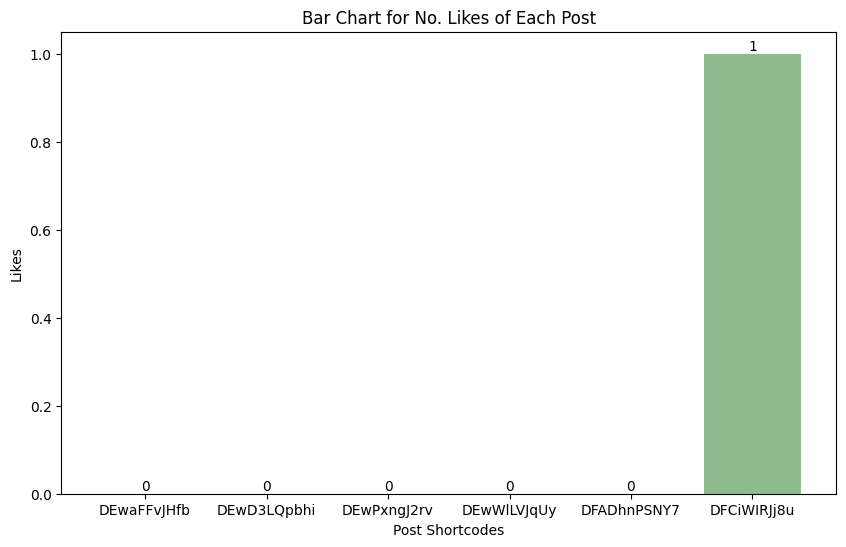

Finish interest analysis.


In [14]:
likes = {} 
for shortcode in shortcodes:
    with open(f"comments/json/{shortcode}.json", "r") as f:
        data = json.load(f)
    print(f"Conducting interest anallysis on post shortcode: {shortcode}")
    likes[f"{shortcode}"] = data["likes"]
plt.figure(figsize=(10, 6))
bars = plt.bar(likes.keys(), likes.values(), color='darkseagreen')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
                ha='center', va='bottom', fontsize=10)
plt.title(f"Bar Chart for No. Likes of Each Post")
plt.xlabel("Post Shortcodes")
plt.ylabel("Likes")
plt.show()
print("Finish interest analysis.")
    

Conducting engagment anallysis on post shortcode: DEwaFFvJHfb
Conducting engagment anallysis on post shortcode: DEwD3LQpbhi
Conducting engagment anallysis on post shortcode: DEwPxngJ2rv
Conducting engagment anallysis on post shortcode: DEwWlLVJqUy
Conducting engagment anallysis on post shortcode: DFADhnPSNY7
Conducting engagment anallysis on post shortcode: DFCiWIRJj8u


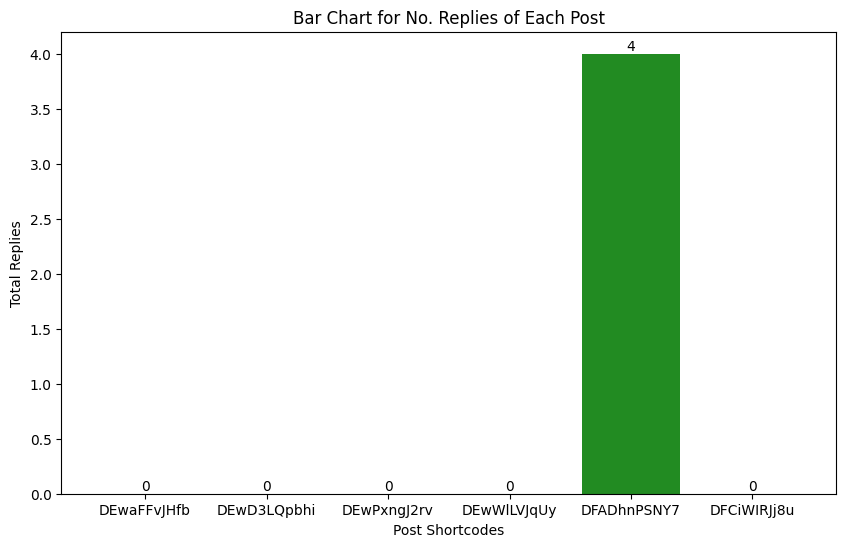

Finish engagment analysis.


In [15]:
replies = {} 
for shortcode in shortcodes:
    with open(f"comments/json/{shortcode}.json", "r") as f:
        data = json.load(f)
    print(f"Conducting engagment anallysis on post shortcode: {shortcode}")
    replies[f"{shortcode}"] = data["replies"]
plt.figure(figsize=(10, 6))
bars = plt.bar(replies.keys(), replies.values(), color='forestgreen')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
                ha='center', va='bottom', fontsize=10)
plt.title(f"Bar Chart for No. Replies of Each Post")
plt.xlabel("Post Shortcodes")
plt.ylabel("Total Replies")
plt.show()
print("Finish engagment analysis.")
    

Conducting basic sentiment analysis on post shortcode: DEwaFFvJHfb


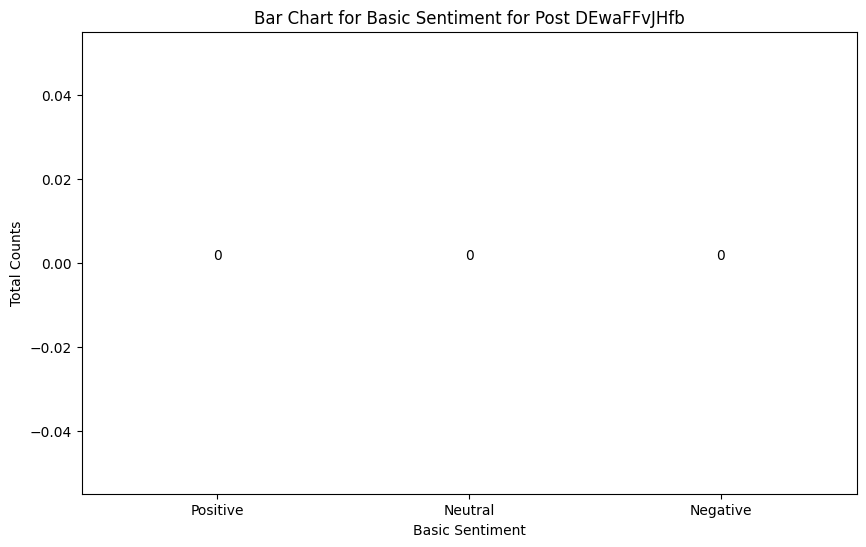

Conducting basic sentiment analysis on post shortcode: DEwD3LQpbhi


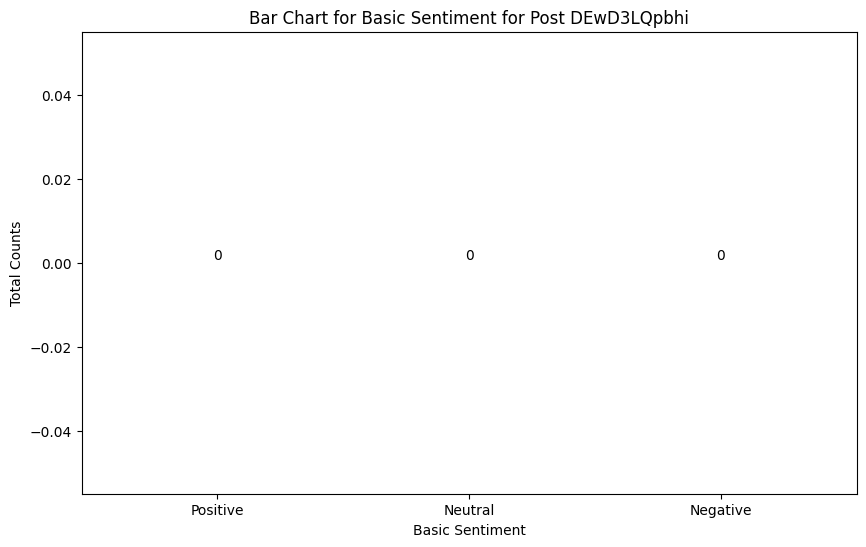

Conducting basic sentiment analysis on post shortcode: DEwPxngJ2rv


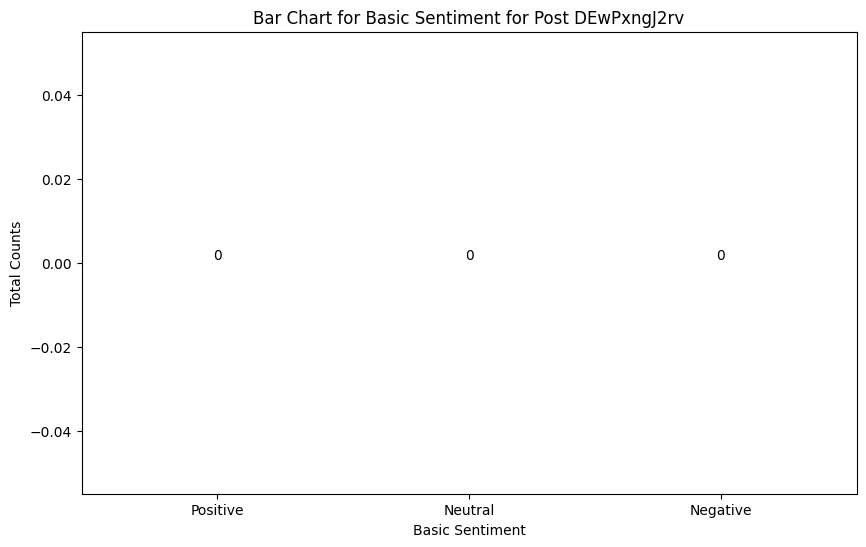

Conducting basic sentiment analysis on post shortcode: DEwWlLVJqUy


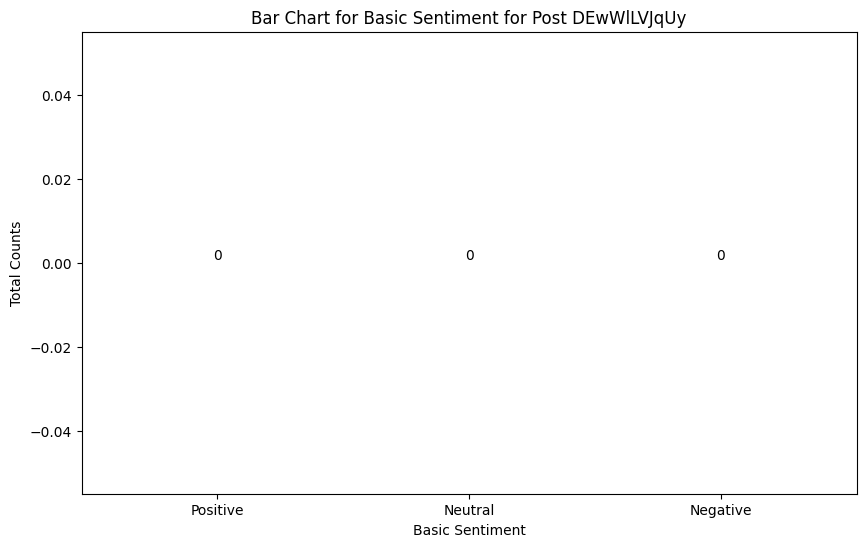

Conducting basic sentiment analysis on post shortcode: DFADhnPSNY7


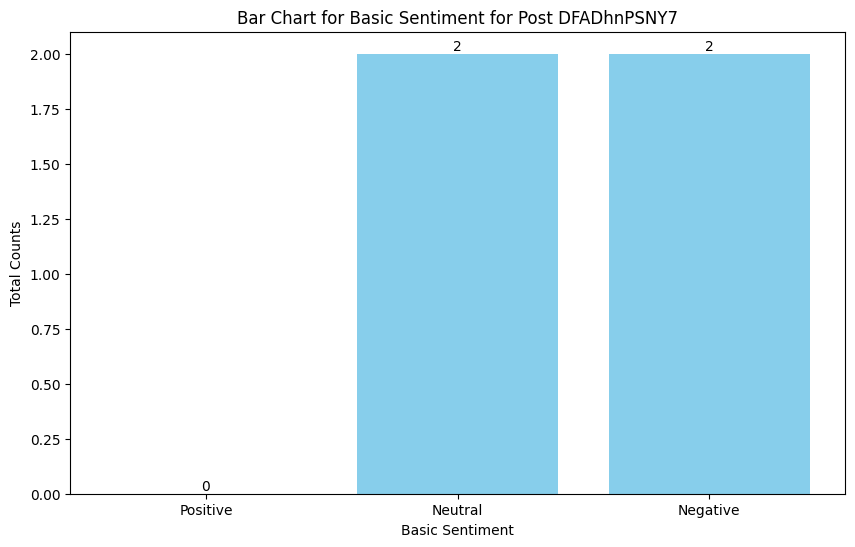

Conducting basic sentiment analysis on post shortcode: DFCiWIRJj8u


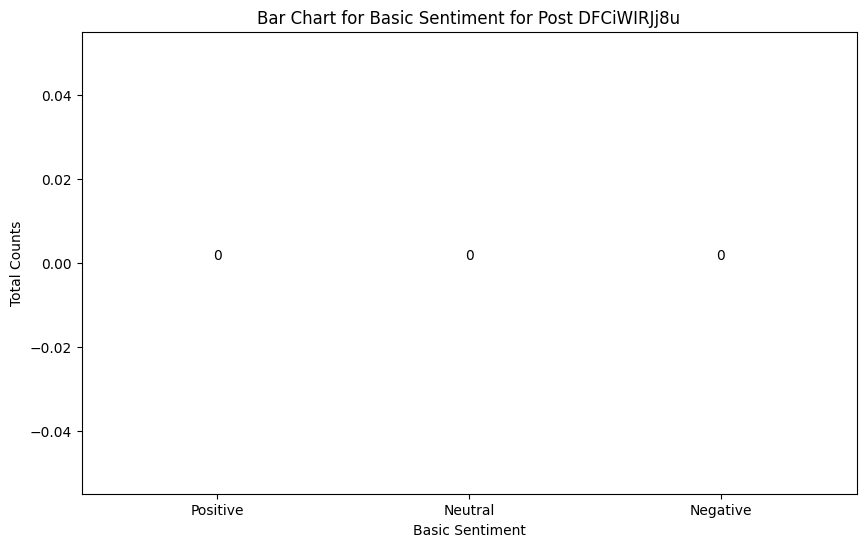

Finish basic sentiment analysis.


In [16]:
for shortcode in shortcodes:
    with open(f"comments/json/{shortcode}.json", "r") as f:
        data = json.load(f)
    print(f"Conducting basic sentiment analysis on post shortcode: {shortcode}")
    b_sentiments = []
    for comment in data["comments"]:
        b_sentiments.append(comment["b_sentiment"])
        if comment["replies"]:
            for reply in comment["replies"]:
                b_sentiments.append(reply["b_sentiment"])
    c_pos = 0
    c_neg = 0
    c_neu = 0
    for b in b_sentiments:
        if b == "pos":
            c_pos += 1
        elif b == "neg":
            c_neg += 1
        else:
            c_neu += 1
    b_sentiments_count = [c_pos, c_neu, c_neg]
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sentiment_labels, b_sentiments_count, color='skyblue')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
                 ha='center', va='bottom', fontsize=10)
    plt.title(f"Bar Chart for Basic Sentiment for Post {shortcode}")
    plt.xlabel("Basic Sentiment")
    plt.ylabel("Total Counts")
    plt.show()
print("Finish basic sentiment analysis.")

Conducting emotion sentiment analysis on post shortcode: DEwaFFvJHfb


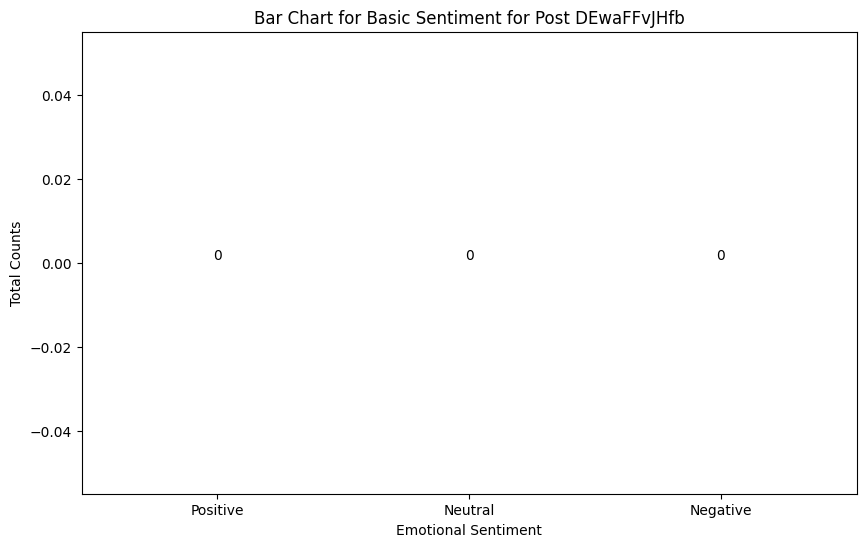

Conducting emotion sentiment analysis on post shortcode: DEwD3LQpbhi


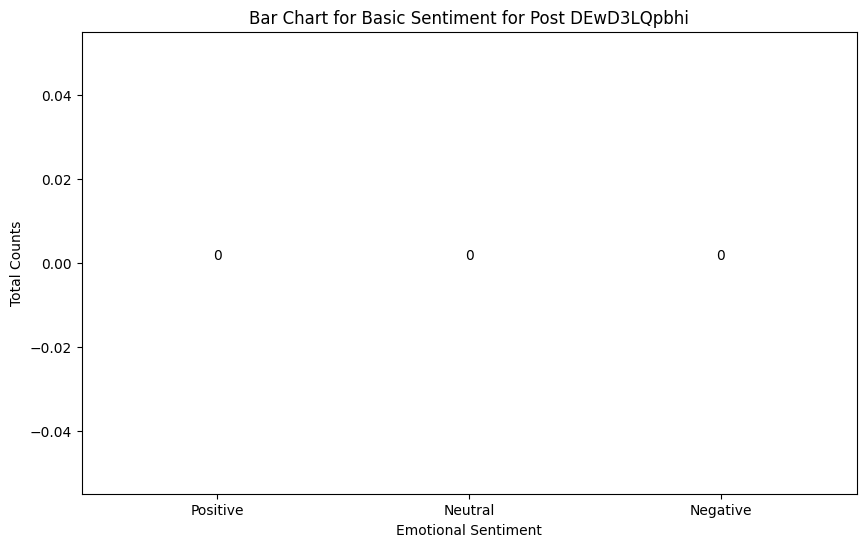

Conducting emotion sentiment analysis on post shortcode: DEwPxngJ2rv


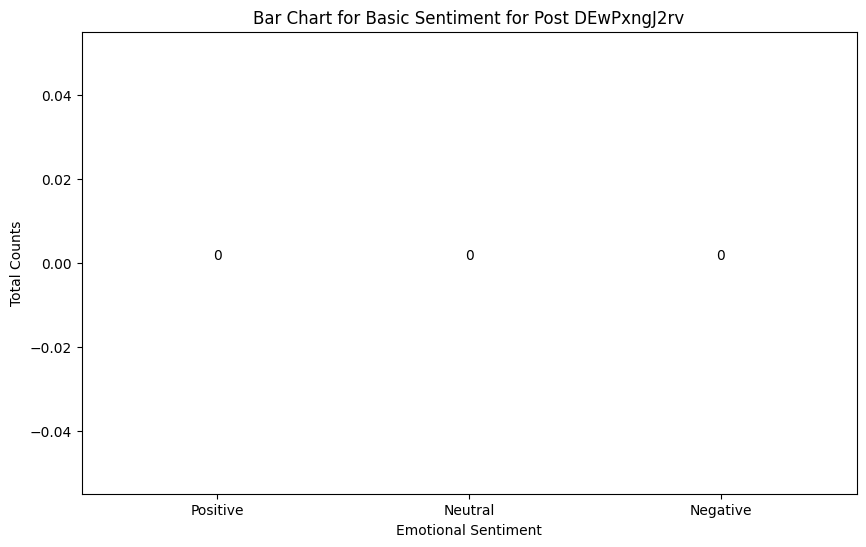

Conducting emotion sentiment analysis on post shortcode: DEwWlLVJqUy


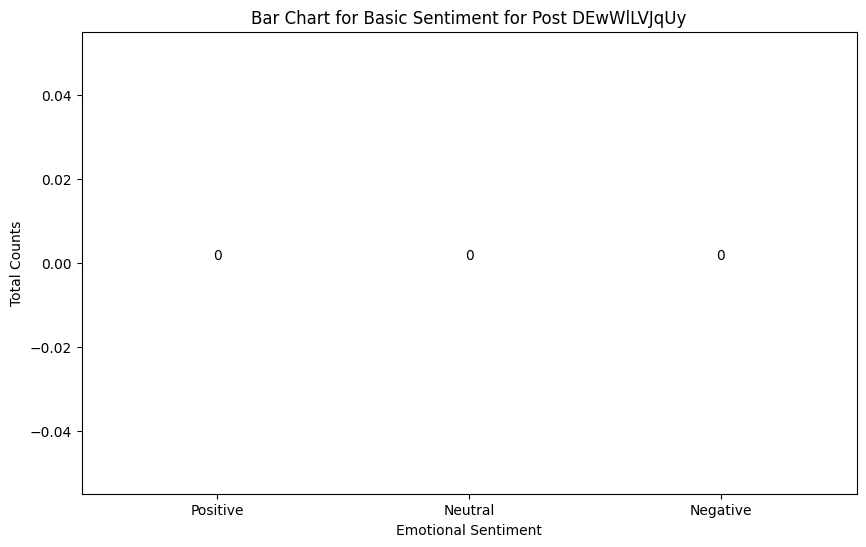

Conducting emotion sentiment analysis on post shortcode: DFADhnPSNY7


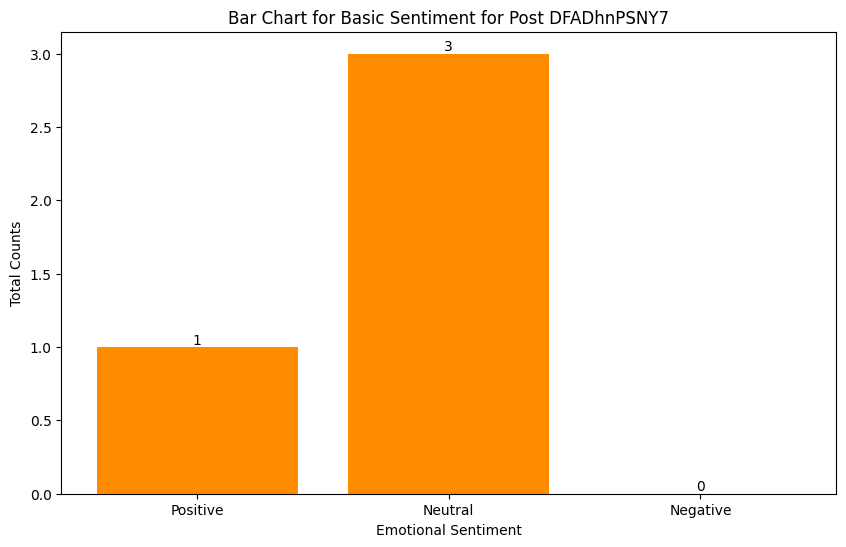

Conducting emotion sentiment analysis on post shortcode: DFCiWIRJj8u


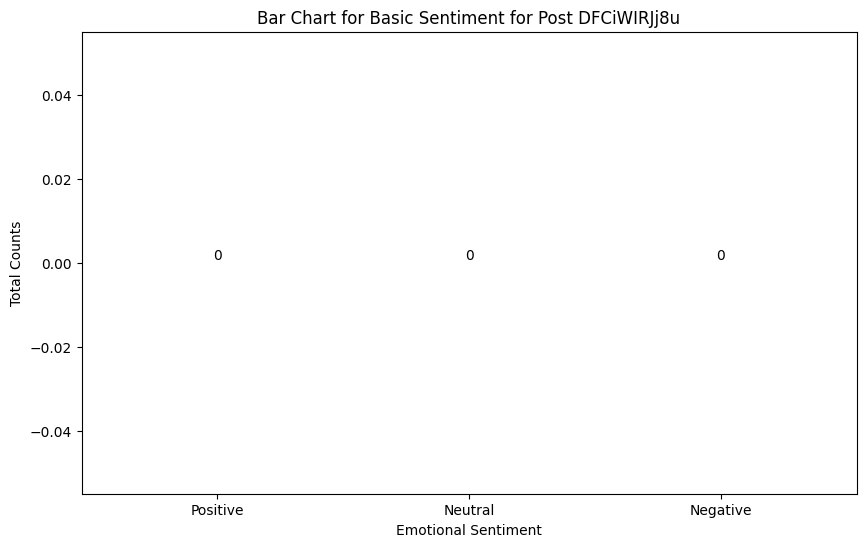

Finish emotion sentiment analysis.


In [17]:
for shortcode in shortcodes:
    with open(f"comments/json/{shortcode}.json", "r") as f:
        data = json.load(f)
    print(f"Conducting emotion sentiment analysis on post shortcode: {shortcode}")
    e_sentiments = []
    for comment in data["comments"]:
        e_sentiments.append(comment["e_sentiment"])
        if comment["replies"]:
            for reply in comment["replies"]:
                e_sentiments.append(reply["e_sentiment"])
    c_pos = 0
    c_neg = 0
    c_neu = 0
    for e in e_sentiments:
        if e == "pos":
            c_pos += 1
        elif e == "neg":
            c_neg += 1
        else:
            c_neu += 1
    e_sentiments_count = [c_pos, c_neu, c_neg]
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sentiment_labels, e_sentiments_count, color='darkorange')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
                 ha='center', va='bottom', fontsize=10)
    plt.title(f"Bar Chart for Basic Sentiment for Post {shortcode}")
    plt.xlabel("Emotional Sentiment")
    plt.ylabel("Total Counts")
    plt.show()
print("Finish emotion sentiment analysis.")

Conducting analysis on post shortcode: DEwaFFvJHfb
[]


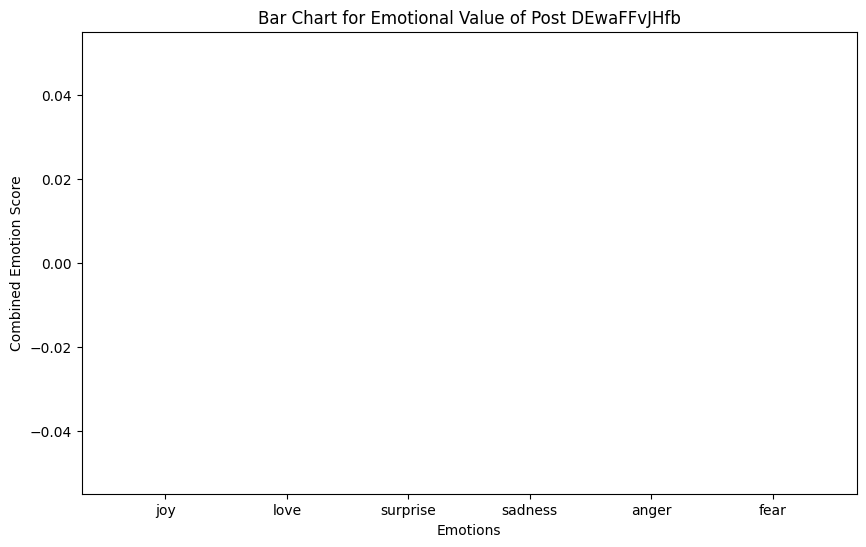

Conducting analysis on post shortcode: DEwD3LQpbhi
[]


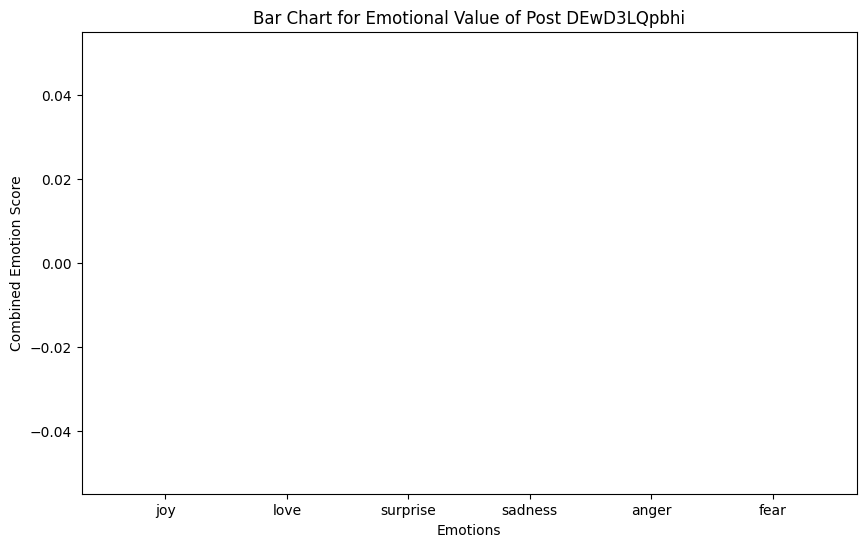

Conducting analysis on post shortcode: DEwPxngJ2rv
[]


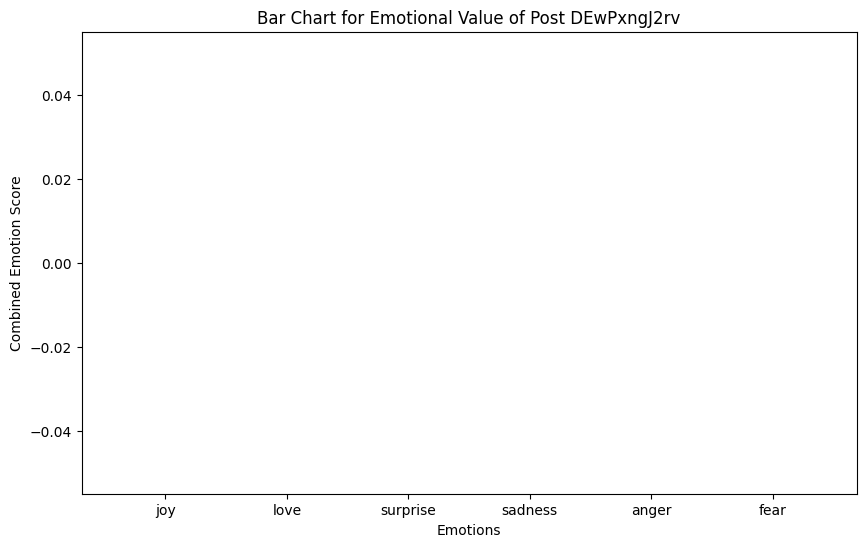

Conducting analysis on post shortcode: DEwWlLVJqUy
[]


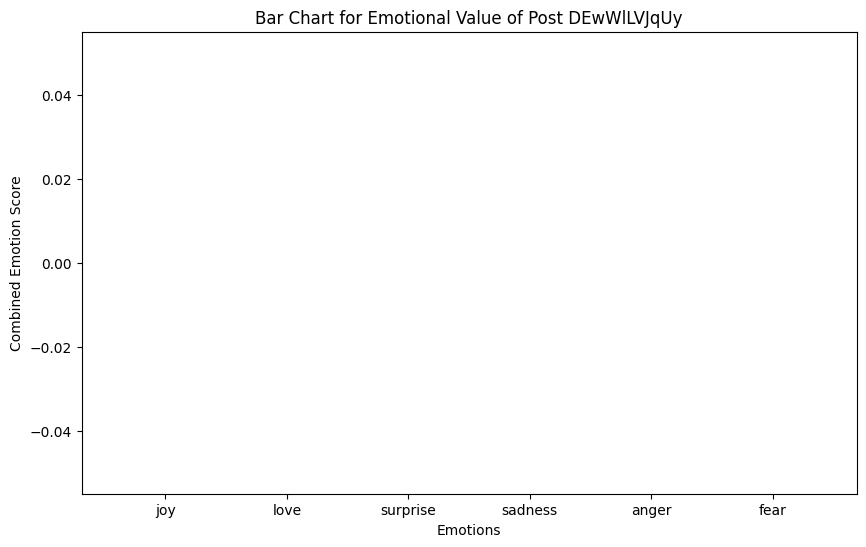

Conducting analysis on post shortcode: DFADhnPSNY7
[{'fear': 0.616374671459198, 'anger': 0.15880797803401947, 'joy': 0.15445464849472046, 'sadness': 0.038007255643606186, 'surprise': 0.025725947692990303, 'love': 0.006629486568272114}, {'joy': 0.590116024017334, 'anger': 0.28366443514823914, 'fear': 0.09394862502813339, 'sadness': 0.014971793629229069, 'surprise': 0.012982472777366638, 'love': 0.004316651728004217}, {'joy': 0.9975894689559937, 'sadness': 0.0008844985859468579, 'love': 0.0006477152346633375, 'anger': 0.0004835428553633392, 'fear': 0.00020185249741189182, 'surprise': 0.0001928990677697584}, {'joy': 0.7320178151130676, 'anger': 0.10602053999900818, 'sadness': 0.07957660406827927, 'fear': 0.07008040696382523, 'love': 0.010175405070185661, 'surprise': 0.002129132393747568}]


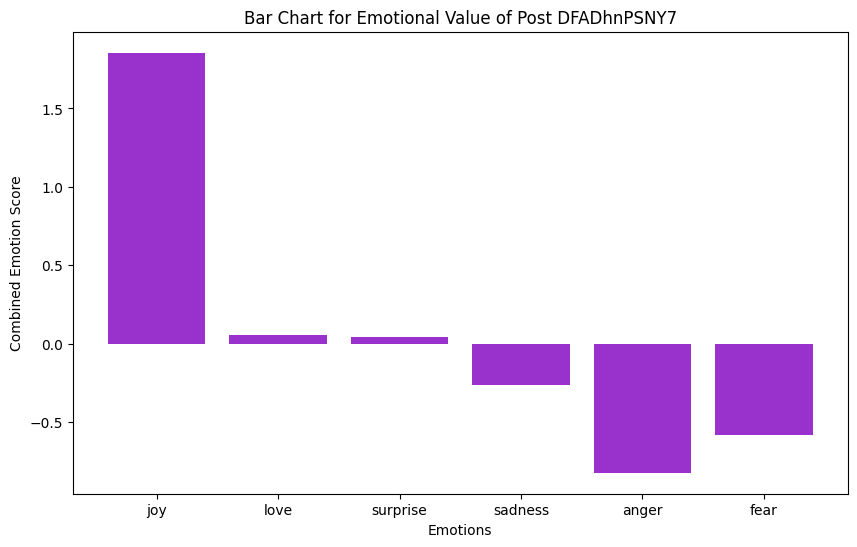

Conducting analysis on post shortcode: DFCiWIRJj8u
[]


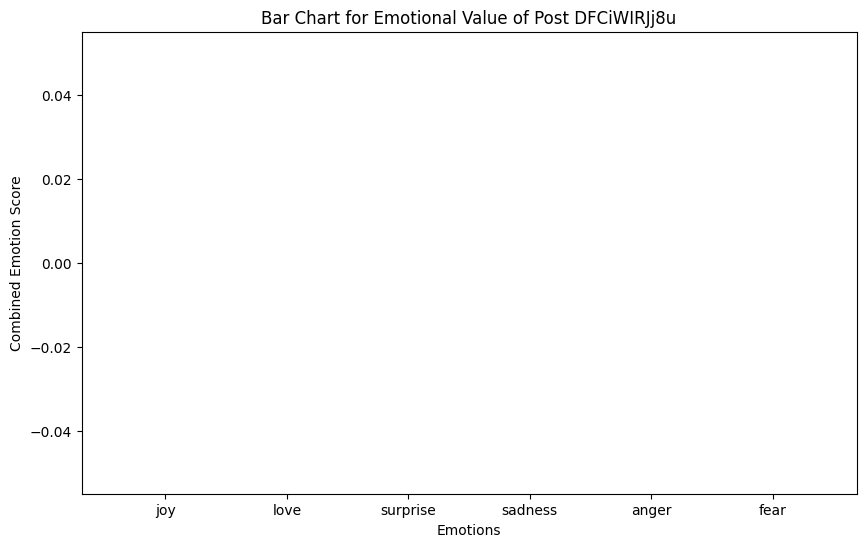

Finish emotion weightage analysis.


In [18]:
for shortcode in shortcodes:
    with open(f"comments/json/{shortcode}.json", "r") as f:
        data = json.load(f)
    print(f"Conducting analysis on post shortcode: {shortcode}")
    escores = []
    for comment in data["comments"]:
        escores.append(comment["emotions"])
        if comment["replies"]:
            for reply in comment["replies"]:
                escores.append(reply["emotions"])
    escores_values = {
        "joy": 0,
        "love": 0,
        "surprise": 0,
        "sadness": 0,
        "anger": 0,
        "fear": 0
    }
    print(escores)
    for e in escores:
        for emotion, score in e.items():
            escores_values[emotion] += score * emotion_weights[emotion]
    plt.figure(figsize=(10, 6))
    plt.bar(escores_values.keys(), escores_values.values(), color="darkorchid")
    plt.title(f"Bar Chart for Emotional Value of Post {shortcode}")
    plt.xlabel("Emotions")
    plt.ylabel("Combined Emotion Score")
    plt.show()
print("Finish emotion weightage analysis.")

In [19]:
from transformers import pipeline
question_answer = pipeline("question-answering", model='distilbert-base-cased-distilled-squad')

DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /distilbert-base-cased-distilled-squad/resolve/main/config.json HTTP/1.1" 200 0
Device set to use cpu


In [20]:
context = '''Context::: NP-Relife-Lab programme is a student-initiated programme and workshop which aims to provide a closed-loop system solution that fosters a culture of the 3Rs (Reduce, Reuse, Recycle) to promote sustainability.
Why NP-Relife-Lab workshop?: It is to reduce the plastic waste generated from the excessive use of single-use bottles driven by convenience and a lack of awareness. To solve it, we are recycling this plastic bottles and reusing them for other purposes by molding into useful items.
Why NP-Relife-Lab Instagram account?: It is to engage students into developing sustainable habits, using various sustainability challenges daily, weekly and monthly, and also as a platform to announce workshop and event updates
Where to find the workshop, its location?: NP-Relife-Lab is located at the Atrium, Block 1 of our NP campus, right besides the cafe Sandwiches.
What is the workshop about?: Students are encourage to recycle their empty plastic bottles consumed of its contents here, which would be processed into reusable containers through a series of procedures to mold the plastic into the desired object.'''

test = "Where do I find the NP-Relife-Lab workshop?"

In [21]:
result = question_answer(question=test, context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'Atrium, Block 1', score: 0.2304, start: 804, end: 819


In [22]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased-distilled-squad')
model = DistilBertForQuestionAnswering.from_pretrained('distilbert-base-cased-distilled-squad')
inputs = tokenizer(test, context, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

start_logits = outputs.start_logits
end_logits = outputs.end_logits
start_index = torch.argmax(start_logits)
end_index = torch.argmax(end_logits) + 1
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs.input_ids[0][start_index:end_index]))
print("Answer:", answer)

DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /distilbert-base-cased-distilled-squad/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /distilbert-base-cased-distilled-squad/resolve/main/config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /distilbert-base-cased-distilled-squad/resolve/main/config.json HTTP/1.1" 200 0


QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ -2.0853,  -6.8916,  -8.7344,  -8.4962,  -8.3308,  -8.7159,  -8.0202,
         -10.0012, -10.0651,  -9.4070, -10.2691, -10.3876, -10.3479,  -9.4979,
          -6.5627,  -7.8508,  -7.6350,  -9.6600,  -9.9747,  -8.7549,  -8.2333,
          -4.9539,  -9.2503,  -9.4886,  -8.0223,  -9.7318,  -9.9824,  -9.1240,
          -9.0154,  -9.3121,  -5.7643,  -4.1985,  -9.7343,  -8.8930,  -8.4087,
          -9.7301,  -7.3566,  -9.4953,  -6.6612,  -7.2339,  -6.4493,  -7.5877,
          -6.6395, -10.1926,  -9.4652,  -9.7476,  -9.4218, -10.2393,  -7.6293,
         -10.1799,  -8.4519,  -8.0519, -10.7575,  -8.9397,  -7.2757, -10.0512,
         -10.7741,  -9.4067,  -7.0610, -10.1851, -10.4058,  -7.4432, -10.0771,
         -10.2824,  -6.6550,  -9.1222, -11.2913,  -8.8420,  -7.5591,  -6.9685,
          -9.6995,  -6.9301,  -6.2630,  -9.1422,  -9.7796,  -8.1920,  -9.7528,
         -10.2582,  -9.8230,  -8.7115,  -8.4724,  -8.2817,  -4.0635,  -6.7961,